# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [2]:
# Import the titanic dataset here
import pandas as pd
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [3]:
# Code here

df_titanic['class'].unique()

df_titanic_passengers = df_titanic[(df_titanic['class'] == '3rd') |
 (df_titanic['class'] == '2nd') | (df_titanic['class'] == '1st')]

table = pd.crosstab(df_titanic_passengers['class'], df_titanic_passengers['embarked'])
pd.crosstab(df_titanic_passengers['class'], df_titanic_passengers['embarked'])


embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [4]:
# Code here
conditional_prob_given_embark = table.div(table.sum(axis=0), axis=1)
conditional_prob_given_embark

embarked,B,C,Q,S
class,,,,
1st,0.333333,0.527675,0.024390,0.191466
2nd,0.666667,0.095941,0.056911,0.268053
3rd,0.000000,0.376384,0.918699,0.540481


In [5]:
conditional_prob_given_class = table.div(table.sum(axis=1), axis=0)
conditional_prob_given_class

embarked,B,C,Q,S
class,,,,
1st,0.009259,0.441358,0.009259,0.540123
2nd,0.021127,0.091549,0.024648,0.862676
3rd,0.000000,0.143865,0.159379,0.696756


The proportion of 3rd class passengers that embarked at South Hampton was 69.7%.
The proportion of South Hampton passengers that were 3rd class was 54%.

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

In [ ]:
from plotnine import *

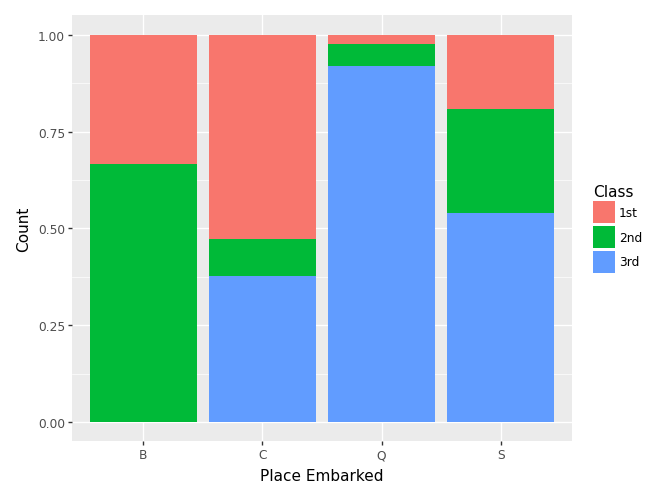

In [8]:
(ggplot(df_titanic_passengers,
aes(x = "embarked"))
+ geom_bar(
  aes(fill = "class"),
  position="fill")
+ labs(x="Place Embarked", y="Count", fill="Class"
)
)

The benefits to the visualization include allowing us to see where the majority of people embarked from as well as a rough idea as to the amount of them werein a specific class given where they embarked. However, its not as beneficial because the visualization does not give us exact numbers that we can extract and use for further analysis.